In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Step1. loading image and turning gray

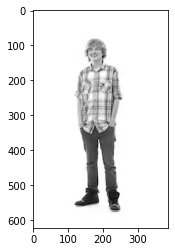

In [2]:
img = cv2.imread('./img_dataset/train/3.jpg', 0)
plt.imshow(img ,  cmap = 'gray')
plt.show()

Step2. catch the contour of person 

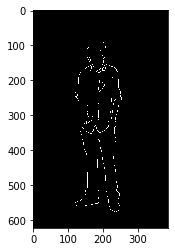

In [3]:
img_blur = cv2.GaussianBlur(img, (13,13), 0)         #高斯平滑 (src, kernel_size(長,寬), 0) size必須是奇數
img_canny = cv2.Canny(img_blur, 30, 150)          #邊緣檢測，canny只能使用灰階圖
# plt.imshow(img_blur, cmap='gray')
plt.imshow(img_canny, cmap ='gray')
plt.show()

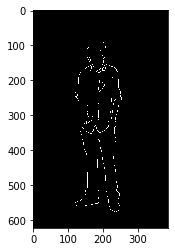

In [4]:

width = int(len(img_canny[0]))
height = int(len(img_canny[0:]))

dim=(width,height)
resizeimg = cv2.resize(img_canny,dim,interpolation = cv2.INTER_AREA)
plt.imshow(resizeimg, cmap ='gray')
plt.show()

# print(resizeimg.shape)
# print(resizeimg[:,:,])

# bodynum = resizeimg[:,:,]

In [5]:
# 切割輪廓
tall = []
wide = []

for i in range(height):
    for j in range(width):
        if resizeimg[i][j] != 0:
            tall.append(i)
            continue

top = tall[0]
bottom = tall[-1]
print(top)
print(bottom)
# 反矩陣
resizeimgarray = np.array(resizeimg)
transpose = resizeimgarray.T

for n in range(width):
    for m in range(height):
        if transpose[n][m] != 0:
            wide.append(n)
            continue

left = wide[0]
right = wide[-1]
print(left)
print(right)

90
574
119
254


(484, 135)


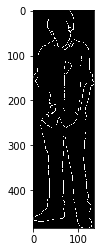

In [6]:
# 切割
cutted = resizeimg[top:bottom, left:right]
print(cutted.shape)
plt.imshow(cutted, cmap ='gray')
plt.show()

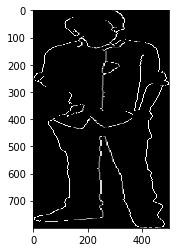

(800, 500)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# 圖片大小統一

dim=(500,800)
unified = cv2.resize(cutted,dim,interpolation = cv2.INTER_AREA)
plt.imshow(unified, cmap ='gray')
plt.show()

print(unified.shape)
print(unified[:,:,])

bodynum = unified[:,:,]

## 儲存數據 （json and csv）

In [8]:
import json 
import csv 

# json
# lis = [{},{},{}...]  
# data = json.dumps(lis, ensure_ascii=False)  
# f.write(data.encode('utf-8')) 

#csv
with open('output.csv', 'w', newline='') as csvfile:
  # 建立 CSV 檔寫入器
  writer = csv.writer(csvfile)

  # 寫入一列資料
  writer.writerow([unified,])
